In [1]:
#importing libraries
import csv

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

from sys import maxsize
from numpy import set_printoptions

from sklearn.datasets import load_boston


In [2]:
with open('../../data/features/benign-bow.csv', 'r') as f:
    original_benign_bow_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/benign-count.csv', 'r') as f:
    original_benign_count_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/malicious-bow.csv', 'r') as f:
    original_malicious_bow_data = list(csv.reader(f, delimiter=","))
with open('../../data/features/malicious-count.csv', 'r') as f:
    original_malicious_count_data = list(csv.reader(f, delimiter=","))

In [3]:
kw_feature_names = np.array(original_benign_bow_data[0:1])
kw_feature_names = kw_feature_names[0]
#print(kw_feature_names)
addl_feature_names = np.array(original_benign_count_data[0:1])
addl_feature_names=addl_feature_names[0]
#print(addl_feature_names)
feature_names=np.concatenate((kw_feature_names, addl_feature_names, ['benign_mal']), axis=0)
print(feature_names)

['<?php' 'and' 'or' 'xor' '__TRAIT__' '__FILE__' '__DIR__' '__NAMESPACE__'
 'exception' '__LINE__' 'array' 'as' 'break' 'case' 'class' 'const'
 'continue' 'declare' 'default' 'die' 'do' 'echo' 'else' 'elseif' 'empty'
 'enddeclare' 'endfor' 'endforeach' 'endif' 'endswitch' 'endwhile' 'eval'
 'exit' 'extends' 'for' 'foreach' 'function' 'global' 'if' 'include'
 'include_once' 'isset' 'list' 'new' 'print' 'require' 'require_once'
 'return' 'static' 'switch' 'unset' 'use' 'var' 'while' '__FUNCTION__'
 '__CLASS__' '__METHOD__' 'final' 'php_user_filter' 'interface'
 'implements' 'public' 'private' 'protected' 'abstract' 'clone' 'try'
 'catch' 'throw' 'cfunction' 'old_function' 'this' 'file_put_contents'
 'file_get_contents' 'assert' '__construct' '=>' '(' ')' '_POST' '_GET'
 'base64_decode' 'insteadof' 'goto' 'alpha' 'numbers' 'splchars'
 'totalChars' 'benign_mal']


In [4]:
benign_bow_data = np.array(original_benign_bow_data[1:], dtype=np.float)
benign_count_data = np.array(original_benign_count_data[1:], dtype=np.float)
benign_data=np.concatenate([benign_bow_data, benign_count_data], axis=1)
benign_target=[0] * benign_data.shape[0]
benign_data=np.hstack((benign_data, np.atleast_2d(benign_target).T))

In [5]:
malicious_bow_data = np.array(original_malicious_bow_data[1:], dtype=np.float)
malicious_count_data = np.array(original_malicious_count_data[1:], dtype=np.float)
malicious_data=np.concatenate([malicious_bow_data, malicious_count_data], axis=1)
malicious_target=[1] * malicious_data.shape[0]
malicious_data=np.hstack((malicious_data, np.atleast_2d(malicious_target).T))

In [6]:
all_comments = np.concatenate((benign_data, malicious_data), axis=0)
all_comments

array([[  0.,   0.,   0., ...,  28., 131.,   0.],
       [  0.,   1.,   0., ...,  15., 108.,   0.],
       [  0.,   1.,   0., ...,  14.,  73.,   0.],
       ...,
       [  0.,   0.,   0., ...,  29.,  69.,   1.],
       [  1.,   0.,   0., ..., 125., 243.,   1.],
       [  0.,   0.,   0., ...,  29.,  69.,   1.]])

In [7]:
php_kw_dataset = {'data': all_comments, 'feature_names': feature_names}
php_kw_dataset

{'data': array([[  0.,   0.,   0., ...,  28., 131.,   0.],
        [  0.,   1.,   0., ...,  15., 108.,   0.],
        [  0.,   1.,   0., ...,  14.,  73.,   0.],
        ...,
        [  0.,   0.,   0., ...,  29.,  69.,   1.],
        [  1.,   0.,   0., ..., 125., 243.,   1.],
        [  0.,   0.,   0., ...,  29.,  69.,   1.]]),
 'feature_names': array(['<?php', 'and', 'or', 'xor', '__TRAIT__', '__FILE__', '__DIR__',
        '__NAMESPACE__', 'exception', '__LINE__', 'array', 'as', 'break',
        'case', 'class', 'const', 'continue', 'declare', 'default', 'die',
        'do', 'echo', 'else', 'elseif', 'empty', 'enddeclare', 'endfor',
        'endforeach', 'endif', 'endswitch', 'endwhile', 'eval', 'exit',
        'extends', 'for', 'foreach', 'function', 'global', 'if', 'include',
        'include_once', 'isset', 'list', 'new', 'print', 'require',
        'require_once', 'return', 'static', 'switch', 'unset', 'use',
        'var', 'while', '__FUNCTION__', '__CLASS__', '__METHOD__', 'final

In [8]:
php_kw_df = pd.DataFrame(php_kw_dataset['data'], columns=php_kw_dataset['feature_names'])
php_kw_df.tail()

<?php  and   or  xor  __TRAIT__  __FILE__  __DIR__  __NAMESPACE__  \
4867    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4868    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4869    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4870    1.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   
4871    0.0  0.0  0.0  0.0        0.0       0.0      0.0            0.0   

      exception  __LINE__  ...  _POST  _GET  base64_decode  insteadof  goto  \
4867        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4868        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4869        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4870        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   
4871        0.0       0.0  ...    0.0   0.0            0.0        0.0   0.0   

      alpha  numbers  splchars  totalChars  benign_mal  
4867   30.0      6.0      32.0        68.0         1.0  
4868    9.0      0.0      15.0        24.0         1.0  
4869   40.0      0.0      29.0        69.0         1.0  
4870  115.0      3.0     125.0       243.0         1.0  
4871   40.0      0.0      29.0        69.0         1.0  

[5 rows x 89 columns]

In [9]:
##### Data Prep Ends ##########

In [10]:
########## Filter method ###########
# compute the pair wise correlation for all columns  
#The correlation coefficient has values between -1 to 1
##— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
##— A value closer to 1 implies stronger positive correlation
##— A value closer to -1 implies stronger negative correlation
correlation_matrix = php_kw_df.corr().round(2)
correlation_matrix = correlation_matrix.fillna(0.999)

pd.set_option('display.max_rows', correlation_matrix.shape[0]+1)

correlation_matrix

<?php    and     or    xor  __TRAIT__  __FILE__  __DIR__  \
<?php              1.000 -0.090 -0.040  0.999      0.999     0.999    0.999   
and               -0.090  1.000  0.210  0.999      0.999     0.999    0.999   
or                -0.040  0.210  1.000  0.999      0.999     0.999    0.999   
xor                0.999  0.999  0.999  0.999      0.999     0.999    0.999   
__TRAIT__          0.999  0.999  0.999  0.999      0.999     0.999    0.999   
__FILE__           0.999  0.999  0.999  0.999      0.999     0.999    0.999   
__DIR__            0.999  0.999  0.999  0.999      0.999     0.999    0.999   
__NAMESPACE__      0.999  0.999  0.999  0.999      0.999     0.999    0.999   
exception         -0.010 -0.010 -0.000  0.999      0.999     0.999    0.999   
__LINE__           0.999  0.999  0.999  0.999      0.999     0.999    0.999   
array             -0.010 -0.040 -0.020  0.999      0.999     0.999    0.999   
as                -0.060  0.360  0.190  0.999      0.999     0.999    0.999   
break             -0.010  0.050  0.020  0.999      0.999     0.999    0.999   
case              -0.020  0.130  0.090  0.999      0.999     0.999    0.999   
class             -0.010  0.050  0.020  0.999      0.999     0.999    0.999   
const              0.999  0.999  0.999  0.999      0.999     0.999    0.999   
continue          -0.020  0.070  0.020  0.999      0.999     0.999    0.999   
declare            0.999  0.999  0.999  0.999      0.999     0.999    0.999   
default            0.999  0.999  0.999  0.999      0.999     0.999    0.999   
die               -0.020 -0.020 -0.010  0.999      0.999     0.999    0.999   
do                -0.050  0.300  0.190  0.999      0.999     0.999    0.999   
echo               0.120 -0.010 -0.010  0.999      0.999     0.999    0.999   
else              -0.020  0.070  0.030  0.999      0.999     0.999    0.999   
elseif             0.999  0.999  0.999  0.999      0.999     0.999    0.999   
empty             -0.010  0.080  0.030  0.999      0.999     0.999    0.999   
enddeclare         0.999  0.999  0.999  0.999      0.999     0.999    0.999   
endfor             0.999  0.999  0.999  0.999      0.999     0.999    0.999   
endforeach         0.999  0.999  0.999  0.999      0.999     0.999    0.999   
endif              0.999  0.999  0.999  0.999      0.999     0.999    0.999   
endswitch          0.999  0.999  0.999  0.999      0.999     0.999    0.999   
endwhile           0.999  0.999  0.999  0.999      0.999     0.999    0.999   
eval              -0.020 -0.030 -0.020  0.999      0.999     0.999    0.999   
exit               0.990 -0.090 -0.040  0.999      0.999     0.999    0.999   
extends            0.999  0.999  0.999  0.999      0.999     0.999    0.999   
for               -0.090  0.440  0.150  0.999      0.999     0.999    0.999   
foreach            0.999  0.999  0.999  0.999      0.999     0.999    0.999   
function          -0.010 -0.020 -0.010  0.999      0.999     0.999    0.999   
global            -0.000  0.030 -0.000  0.999      0.999     0.999    0.999   
if                -0.050  0.230  0.220  0.999      0.999     0.999    0.999   
include           -0.010  0.000 -0.010  0.999      0.999     0.999    0.999   
include_once       0.999  0.999  0.999  0.999      0.999     0.999    0.999   
isset              0.999  0.999  0.999  0.999      0.999     0.999    0.999   
list              -0.010  0.010 -0.000  0.999      0.999     0.999    0.999   
new               -0.020  0.090  0.040  0.999      0.999     0.999    0.999   
print             -0.010  0.010 -0.000  0.999      0.999     0.999    0.999   
require           -0.000  0.020 -0.000  0.999      0.999     0.999    0.999   
require_once       0.999  0.999  0.999  0.999      0.999     0.999    0.999   
return            -0.010  0.060  0.050  0.999      0.999     0.999    0.999   
static            -0.000 -0.010 -0.000  0.999      0.999     0.999    0.999   
switch            -0.000  0.010 -0.000  0.999      0.999     0.999   

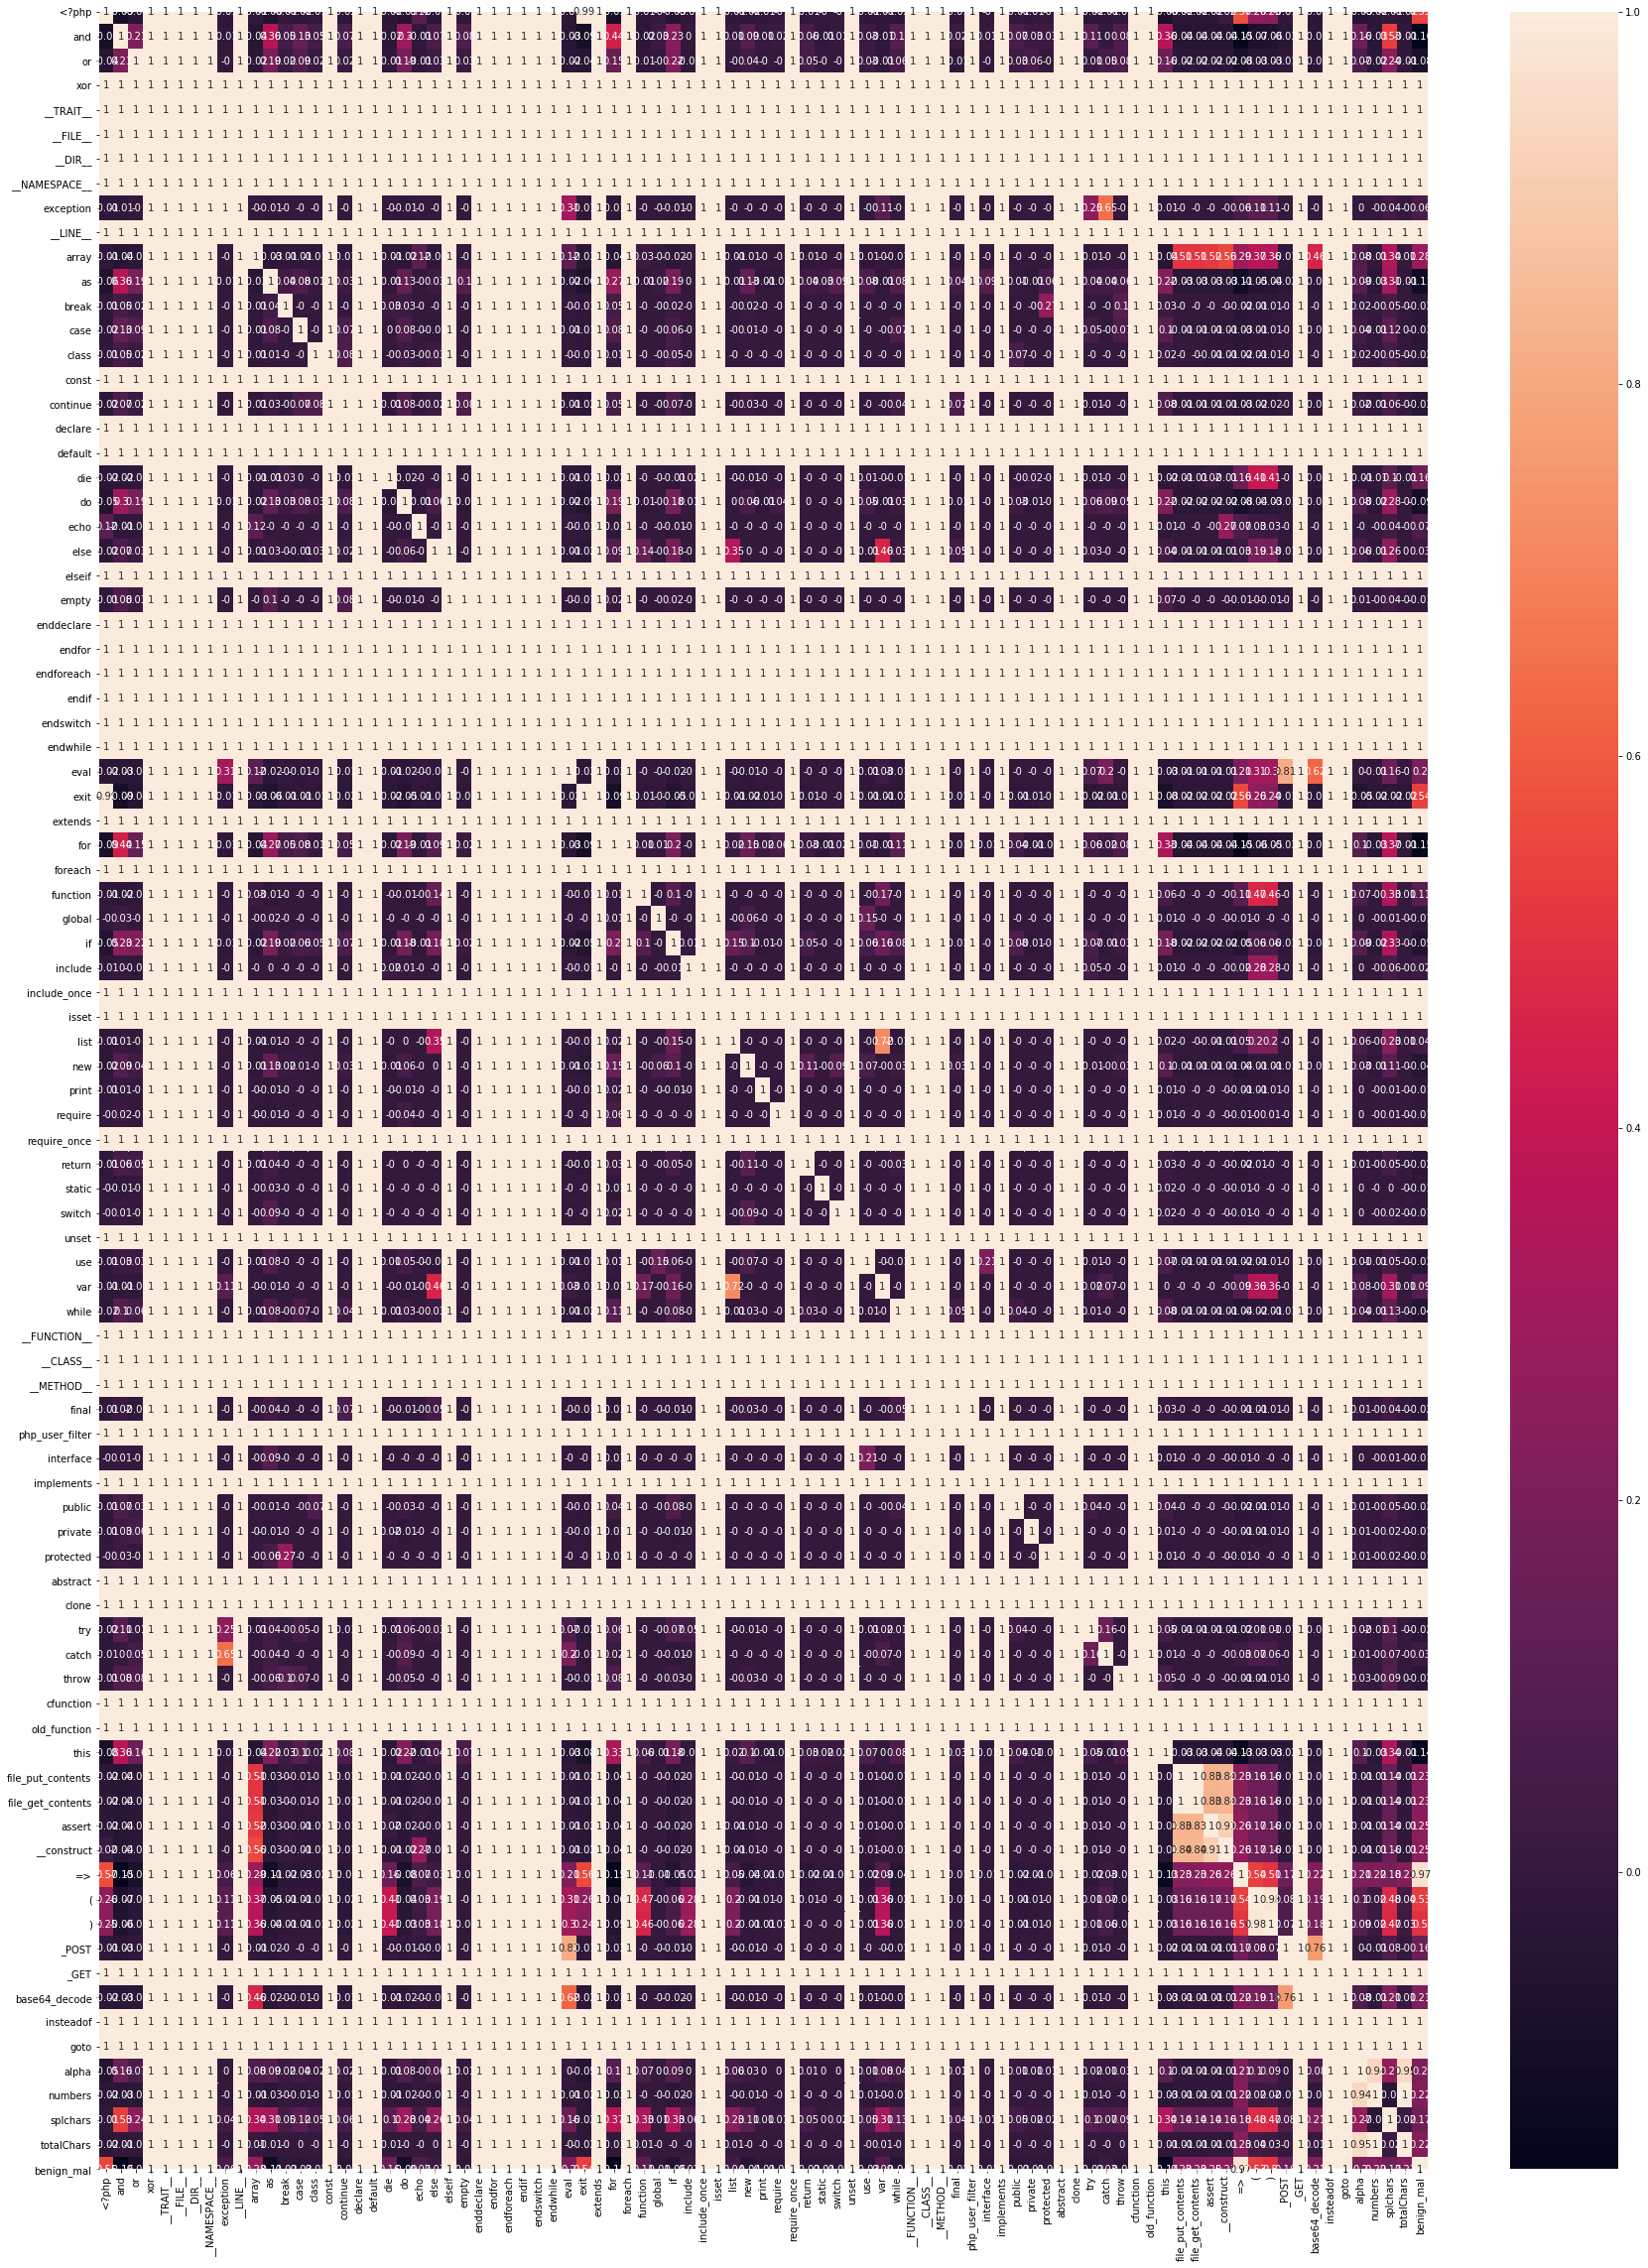

In [11]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
plt.subplots(figsize=(30,40))
sns.heatmap(data=correlation_matrix, annot=True)

In [12]:
correlation_matrix['benign_mal']

<?php                0.550
and                 -0.160
or                  -0.080
xor                  0.999
__TRAIT__            0.999
__FILE__             0.999
__DIR__              0.999
__NAMESPACE__        0.999
exception            0.060
__LINE__             0.999
array                0.280
as                  -0.110
break               -0.020
case                -0.030
class               -0.020
const                0.999
continue            -0.030
declare              0.999
default              0.999
die                  0.160
do                  -0.090
echo                 0.070
else                 0.030
elseif               0.999
empty               -0.010
enddeclare           0.999
endfor               0.999
endforeach           0.999
endif                0.999
endswitch            0.999
endwhile             0.999
eval                 0.200
exit                 0.540
extends              0.999
for                 -0.150
foreach              0.999
function             0.110
g

In [13]:
##correlation_matrix.sort_values("benign_mal", inplace = True)
corr_target = abs(correlation_matrix['benign_mal'])
  
# filtering data on basis of both filters 
##feature_sel.where(filter1, inplace = True)
selected_feature=corr_target[corr_target>0.050]
selected_feature.sort_values()

exception            0.060
echo                 0.070
or                   0.080
var                  0.090
do                   0.090
function             0.110
as                   0.110
this                 0.140
for                  0.150
and                  0.160
die                  0.160
_POST                0.160
splchars             0.170
eval                 0.200
alpha                0.200
base64_decode        0.210
totalChars           0.220
numbers              0.220
file_get_contents    0.230
file_put_contents    0.230
__construct          0.250
assert               0.250
array                0.280
)                    0.500
(                    0.530
exit                 0.540
<?php                0.550
=>                   0.970
old_function         0.999
php_user_filter      0.999
cfunction            0.999
_GET                 0.999
insteadof            0.999
clone                0.999
abstract             0.999
implements           0.999
goto                 0.999
_

In [14]:
features=selected_feature.index
print(selected_feature.shape)

(63,)


In [15]:
#Loading the dataset
x = load_boston()
print(x.feature_names)
#print(x.DESCR)
#print(x.data)
#print(x.target)
df = pd.DataFrame(x.data, columns = x.feature_names)
df["MEDV"] = x.target
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [16]:
print(x.target.shape)

(506,)
